In [55]:
import matplotlib.pyplot as plt

In [56]:
import tensorflow as tf

In [57]:
mnist = tf.keras.datasets.mnist

# MNIST Dataset

# The MNIST dataset has thousands of images of handwritten digits from 0 to 9. The following image shows examples of some of the data I will be using from the dataset to train my machine learning model

![](MnistExamples.png)

We will now automatically split the data into a testing and training group. 70% of the data will be used for testing and 30%  will be used for training.

In [58]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

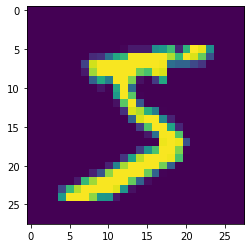

In [59]:
plt.imshow(x_train[0])
plt.show()

In [60]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

I will use feature scaling to normalize the range of data. This is done because we do not want a feature of a larger value to overshadow the effects of the feature with a smaller value. Every feature will scale down between 0 and 1

In [61]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [62]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

![](layers.png)
 The diagram shows the process of how the multilayer perceptron works. We will have multiple inputs from 0 to 9 and we will make 3 dense layers and in the end, we will have a softmax layer which will give multiple outputs (i.e. the outputs will range from 0 to 9) 

In [77]:
datamodel = tf.keras.models.Sequential()
datamodel.add(tf.keras.layers.Flatten())


![](flatten.png)
 The flatten method converts our data of 28x28 into 1x784. The matrix will be converted into a single 1 dimensional array and can now be input into the next layer.  

In [78]:
datamodel.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
datamodel.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

![](dense.png)
 <font size="4">The first layer was 1x784 so it had 784 neurons and now in the second layer, which is connected to the first layer, we will have 128 neurons and in the third layer, we will also have 128 neurons. All these layers use the activation function. Every neuron has some kind of data to process for the output. If the quality of the data crosses a threshold value, only then will the neuron process the data, the other neurons will not process it. So only the neuron that is best trained will give the output. So to set a threshold value, we use the activation function. </font>

In [79]:
datamodel.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [80]:
datamodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
datamodel.fit(x_train, y_train, epochs = 12)

Epoch 1/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4636 - accuracy: 0.8706
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1094 - accuracy: 0.9662
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9792
Epoch 4/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0527 - accuracy: 0.9831
Epoch 5/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0383 - accuracy: 0.9875
Epoch 6/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9910
Epoch 7/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9922
Epoch 8/12
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 9/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 10/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.011

 epochs = 12 means that the algorithm will go through the dataset 12 times. 

In [81]:
loss,accuracy=datamodel.evaluate(x_test,y_test)

313/313 [==============================] - 0s 979us/step - loss: 0.1347 - accuracy: 0.9726


In [82]:
loss

0.13465869426727295

In [83]:
accuracy

0.972599983215332

In [84]:
accuracypercentage = accuracy*100
print (accuracypercentage)

97.2599983215332


 The model is 97.3% accurate 

In [85]:
datamodel.save(r'/Users/irtaza/Documents/')

INFO:tensorflow:Assets written to: /Users/irtaza/Documents/assets


In [86]:
predictionmodel=tf.keras.models.load_model(r'/Users/irtaza/Documents/')
predictions= predictionmodel.predict(x_test)

In [87]:
import numpy as np

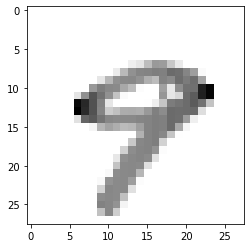

In [94]:
plt.imshow(x_test[9],cmap=plt.cm.binary)
plt.show()

In [95]:
np.argmax(predictions[9])

9

 Model correctly answers that the image in the dataset is a digit of the number 9 

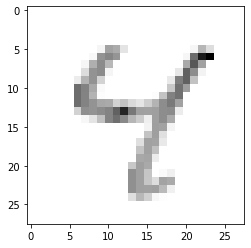

In [98]:
plt.imshow(x_test[6],cmap=plt.cm.binary)
plt.show()

In [99]:
np.argmax(predictions[6])

4

 Model correctly answers that the image in the dataset is a digit of the number 4 

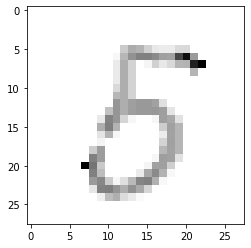

In [100]:
plt.imshow(x_test[45],cmap=plt.cm.binary)
plt.show()

In [101]:
np.argmax(predictions[45])

5

 Model correctly answers that the image in the dataset is a digit of the number 5 

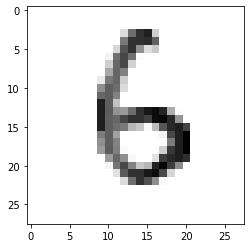

In [104]:
plt.imshow(x_test[21],cmap=plt.cm.binary)
plt.show()

In [106]:
np.argmax(predictions[21])

6

 Model correctly answers that the image in the dataset is a digit of the number 5 